In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.io as sio

from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/CSE512/HW4'

Mounted at /content/gdrive
/content/gdrive/My Drive/CSE512/HW4


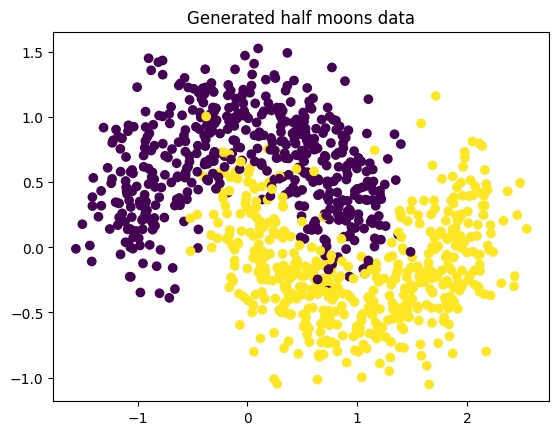

In [2]:
#noise = 0.25
#X, y = datasets.make_moons(n_samples=1000, noise=noise) #train data
#Xt, yt = datasets.make_moons(n_samples=100, noise=noise) # test data
#y = 2*y-1
#yt = 2*yt-1
#sio.savemat('halfmoon_data.mat',{'X':X,'y':y,'Xt':Xt,'yt':yt})

data = sio.loadmat('halfmoon_data.mat')
X = data['X']
Xt = data['Xt']
y = data['y'][0,:]
yt = data['yt'][0,:]

plt.scatter(*X.T, c=y)
plt.title("Generated half moons data");

def plot_model_contour(model):
    xlist = np.linspace(-3.0, 3.0, 100)
    ylist = np.linspace(-3.0, 3.0, 100)
    Xp, Yp = np.meshgrid(xlist, ylist)
    Zp = Xp*0.
    for i in range(Xp.shape[0]):
        x = []
        for j in range(Xp.shape[1]):
            x.append(np.array([Xp[i,j],Yp[i,j]]))
        x = np.vstack(x)
        Zp[i,:] = model(x)
    return Xp,Yp,Zp


In [21]:
def fit_data(X,y,Kfun,rho,maxiter=1000):
    K = Kfun(X,X)
    def get_grad(u):
        return np.ones_like(u) - (y * np.dot(u * y, K))

    u = np.ones(X.shape[0])
    for _ in range(maxiter):
        u = np.clip(u - 0.01 * get_grad(u), 0, rho)

    def inference(x):
        Kt = Kfun(x,X)
        return np.sign(np.dot(y * u, Kt.T))
    return inference

def LinearKfun(X1,X2):
    return np.dot(X1,X2.T)

rhos = [0.01, 0.1, 1, 10]
for rho in rhos:
    inference = fit_data(X, y, LinearKfun, rho)
    print(f"rho = {rho}, Train error: {np.mean(inference(X) != y):.4f}, Test error: {np.mean(inference(Xt) != yt):.4f}")

rho = 0.01, Train error: 0.2580, Test error: 0.2900
rho = 0.1, Train error: 0.2540, Test error: 0.2900
rho = 1, Train error: 0.2530, Test error: 0.2900
rho = 10, Train error: 0.2530, Test error: 0.2900


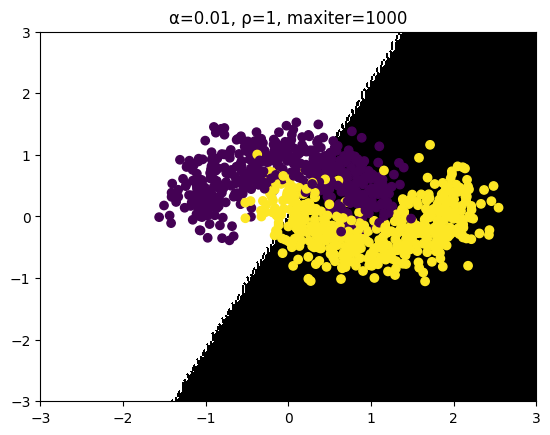

In [22]:
inference = fit_data(X, y, LinearKfun, 1)
Xp, Yp, Zp = plot_model_contour(inference)
plt.contourf(Xp, Yp, Zp, colors=['#FFFFFF', '#000000'])
plt.scatter(*X.T, c=y)
plt.title("α=0.01, ρ=1, maxiter=1000")
plt.show()

In [19]:
def fit_data(X,y,Kfun,sigma,rho,maxiter=1000):
    K = Kfun(X,X,sigma)
    def get_grad(u):
        return np.ones_like(u) - (y * np.dot(u * y, K))

    u = np.ones(X.shape[0])
    for _ in range(maxiter):
        u = np.clip(u - 0.01 * get_grad(u), 0, rho)

    def inference(x):
        Kt = Kfun(x,X,sigma)
        return np.sign(np.dot(y * u, Kt.T))
    return inference

def RBFKfun(X1,X2,sigma):
    sq = np.sum(X1**2, axis=1).reshape(-1, 1) - 2 * np.dot(X1, X2.T) + np.sum(X2**2, axis=1)
    return np.exp(- sq / (2 * sigma**2))

sigmas = [1, 0.1, 0.001, 0.0001]
for sigma in sigmas:
    inference = fit_data(X, y, RBFKfun, sigma, 1)
    print(f"Sigma: {sigma}, Train error: {np.mean(inference(X) != y):.4f}, Test error: {np.mean(inference(Xt) != yt):.4f}")

Sigma: 1, Train error: 0.1990, Test error: 0.2200
Sigma: 0.1, Train error: 0.0520, Test error: 0.0400
Sigma: 0.001, Train error: 0.0020, Test error: 0.5200
Sigma: 0.0001, Train error: 0.0000, Test error: 0.9700


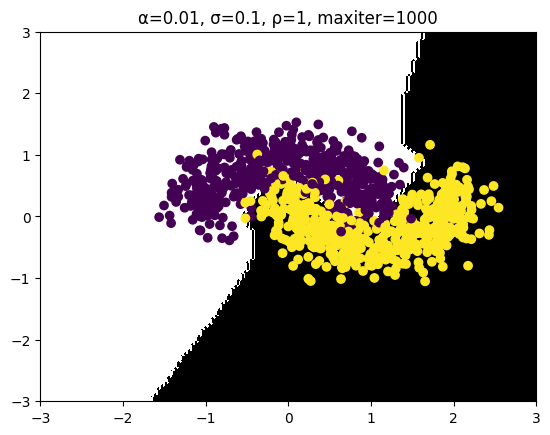

In [20]:
inference = fit_data(X, y, RBFKfun, 0.1, 1)
Xp, Yp, Zp = plot_model_contour(inference)
plt.contourf(Xp, Yp, Zp, colors=['#FFFFFF', '#000000'])
plt.scatter(*X.T, c=y)
plt.title("α=0.01, σ=0.1, ρ=1, maxiter=1000")
plt.show()